# Tully's Fewest Surface Hopping Algorithm
This code implement the Tully's Fewest Surface Hopping Algorithm as introduced in the article Tully, J.C. *J. Chem. Phys.* (**1990**) 93 1061.

### Features to include

1. **Choosing directly from the beginning which graph do we want to display:** 
create the full picture of the original work of Tully

    model = ["model 1", "model 2", "model 3"]
    pic = ["pic a","pic b","pic c"]

and then one goes

    for p = pic ...

and then can create all the plots

> “God does not care about our mathematical difficulties. He integrates empirically.”   
> ~Albert Einstein

The simulation is performed taking care of the following parameters:
- **pos**: position of the particle (float)
- **k**: momentum of the particle
- $c_1$: coefficient of "how much" the particle is smeared on the first surface and how much is on the second surface. $c_1^2 + c_2^2 = 1 $. 
- **surface**: can take value 1 or 2. Denotes the surface in which the particle is moving.
- **m**: mass of the system.

In [3]:
println("--- Script started ---")
println("--- Importing methods ---")
include("particle_methods.jl")
println("--- methods imported correctly ---")

--- Script started ---
--- Importing methods ---


┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


--- methods imported correctly ---


In [4]:
# -----------------------------
using LinearAlgebra
using Plots
using Random
# -----------------------------

In [19]:
dt = 1;
n_time_steps = 2000;

# the label debug can assume two values:
# - false: will run a single trajectory dynamics and will plot all the meaningful quantitiues
#   for debugging
# - true: will run plot the results of the original paper of Tully
debug = false;


# Possible models are
#   - Simple_avoided_crossing
#   - Dual_avoided_crossing
#   - Extended_coupling
Potential(x) = Simple_avoided_crossing(x)

# There are 3 possible plots. So far the code is able to reproduce only "a" and "b"
pic = "a"

"a"

In [25]:
if debug
    n_test = 1
    k_range = [8.75]
    # -- quantites to be printed --
    dens = zeros(n_time_steps)
    nacs = zeros(n_time_steps)
    cb = zeros(n_time_steps)
    E_s = zeros(n_time_steps)
    T_s = zeros(n_time_steps)
    V_s = zeros(n_time_steps)
    c1s = zeros(Complex,(1,n_time_steps))
    c2s = zeros(Complex,(1,n_time_steps))
else
    n_test = 200;
    #k_range = [15, 20, 25, 30, 35, 40]
    k_range = [8, 9, 10, 12.5, 15, 20, 25, 30, 35];
    # every value below 8.9 should be zero
end

9-element Array{Float64,1}:
  8.0
  9.0
 10.0
 12.5
 15.0
 20.0
 25.0
 30.0
 35.0

In [26]:
if pic == "a"
    transm = []
    for k = k_range
        counter = 0;
        for i = 1:n_test
            if (i%25 == 0)
                println("we are at k= $k and iteration $i out of $n_test")
            end
            pos, k, c1, surf, m = create(-5,k);
            c2 = sqrt(1.0-c1*conj(c1));
            vel = k/m;
            iter = 0;
            while iter < n_time_steps && pos < 4.0
                iter += 1
                #pos, vel = time_evolution(pos,surf,m,dt,vel)
                pos, c1, c2, vel = time_evolution_rk4(pos,surf,c1,c2,vel,m,dt)
                #c1,c2 = update_density_coefficients(pos, c1, c2, vel, dt)
                if debug
                    dens[iter] = sqrt(c1*conj(c1)+c2*conj(c2));
                    nacs[iter] = nac(pos,surf,3-surf)
                    c1s[iter] = c1
                    c2s[iter] = c2
                    E_s[iter] = total_energy(pos,vel,surf);
                    V_s[iter] = potential_energy(pos,surf);
                    T_s[iter] = kinetic_energy(vel,m);
                    if surf == 1
                        cb[iter] = coeff_b(pos,vel,2,1,c1,c2)*dt/(c1*conj(c1))
                    else
                        cb[iter] = coeff_b(pos,vel,1,2,c1,c2)*dt/(c2*conj(c2))
                    end
                end
                vel, surf = switch_surface(pos, vel, surf, c1, c2, m, dt)
            end
            # println(pos)
            if surf == 2
                counter += 1
            end
        end
        print(counter/n_test,"\n")
        push!(transm,counter/n_test)
        print(transm)
    end
end

we are at k= 8.0 and iteration 25 out of 200
we are at k= 8.0 and iteration 50 out of 200
we are at k= 8.0 and iteration 75 out of 200
we are at k= 8.0 and iteration 100 out of 200
we are at k= 8.0 and iteration 125 out of 200
we are at k= 8.0 and iteration 150 out of 200
we are at k= 8.0 and iteration 175 out of 200
we are at k= 8.0 and iteration 200 out of 200
0.01
Any[0.01]we are at k= 9.0 and iteration 25 out of 200
we are at k= 9.0 and iteration 50 out of 200
we are at k= 9.0 and iteration 75 out of 200
we are at k= 9.0 and iteration 100 out of 200
we are at k= 9.0 and iteration 125 out of 200
we are at k= 9.0 and iteration 150 out of 200
we are at k= 9.0 and iteration 175 out of 200
we are at k= 9.0 and iteration 200 out of 200
0.09
Any[0.01, 0.09]we are at k= 10.0 and iteration 25 out of 200
we are at k= 10.0 and iteration 50 out of 200
we are at k= 10.0 and iteration 75 out of 200
we are at k= 10.0 and iteration 100 out of 200
we are at k= 10.0 and iteration 125 out of 200
we a

In [27]:
if pic == "b"
    transm = []
    for k = k_range
        counter = 0;
        for i = 1:n_test
            if (i%25 == 0)
                println("we are at k= $k and iteration $i out of $n_test\n")
            end
            pos, k, c1, surf, m = create(-5,k,0,2);
            c2 = sqrt(1.0-c1*conj(c1));
            vel = k/m;
            iter = 0;
            while iter < n_time_steps && pos < 4.0
                iter += 1
                #pos, vel = time_evolution(pos,surf,m,dt,vel)
                pos, c1, c2, vel = time_evolution_rk4(pos,surf,c1,c2,vel,m,dt)
                #c1,c2 = update_density_coefficients(pos, c1, c2, vel, dt)
                if debug
                    dens[iter] = sqrt(c1*conj(c1)+c2*conj(c2));
                    nacs[iter] = nac(pos,surf,3-surf)
                    c1s[iter] = c1
                    c2s[iter] = c2
                    E_s[iter] = total_energy(pos,vel,surf);
                    V_s[iter] = potential_energy(pos,surf);
                    T_s[iter] = kinetic_energy(vel,m);
                    if surf == 1
                        cb[iter] = coeff_b(pos,vel,2,1,c1,c2)*dt/(c1*conj(c1))
                    else
                        cb[iter] = coeff_b(pos,vel,1,2,c1,c2)*dt/(c2*conj(c2))
                    end
                end
                vel, surf = switch_surface(pos, vel, surf, c1, c2, m, dt)
            end
            # println(pos)
            if surf == 1
                counter += 1
            end
        end
        print(counter/n_test,"\n")
        push!(transm,counter/n_test)
        print(transm)
    end
end

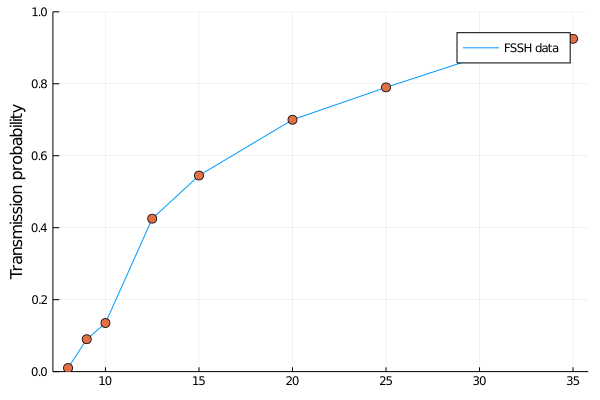

In [28]:
if debug
    gr()
    # wavefunction density plot
    p1 = plot(1:n_time_steps,dens,
        label="wavefunction",
        ylims = (1.0-1e-5, 1.0+1e-5),
        #xlabel="Time steps",
        #xtickfont = font(20, "Courier")
        )
    #ylabel!("Norm of the wavefunction")
    #title!("Time evolution of the pseudo-particle")
    # non adiabatic coupling terms plot
    p2=plot(1:n_time_steps,nacs,label="NAC")
    # evolution of the coefficients c_1 and c_2
    p3=plot(1:n_time_steps,norm.(c1s)[:],label="c_1")
    p3=plot!(1:n_time_steps,norm.(c2s)[:],label="c_2")
    #title!("evolution of c_1 and c_2")
    p4 = plot(1:n_time_steps,[E_s, T_s, V_s])
    # final plot
    plot(p1,p2,p3,p4,layout=(4,1),legend=false)
    # plot!(1:n_time_steps,cb)
else
    if pic == "a"
        gr()
        plot(k_range,transm,
        label="FSSH data",
        ytickfont = font(8),
        xtickfont = font(8),
        ylim = (0,1),
        ylabel="Transmission probability"
        )
        scatter!(k_range,transm,
        markershape = :circle,
        markersize = 5,
        label="",
        )
    elseif pic == "b"
        gr()
        plot(k_range,ones(size(k_range))-transm,
        label="FSSH data",
        ytickfont = font(8),
        xtickfont = font(8),
        ylim = (0,1),
        ylabel="Reflection probability"
        )
        scatter!(k_range,ones(size(k_range))-transm,
        markershape = :circle,
        markersize = 5,
        label="",
        )
    end
end

In [24]:
println("script ended\n")

script ended

